In [30]:
# Import Skleaen libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
# Import other Libraries
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy import stats
sns.set()


In [41]:
# Separate Good and Bad Customers Data
temp_data = pd.read_csv("C:\Project_Files\Capstone1_Files\German_CreditRating_Cleaned_Data.csv")
print("shape of the Original data",temp_data.shape)
good_customers = temp_data[temp_data['credibility'] == 1]
bad_customers = temp_data[temp_data['credibility'] == 0]

shape of the Original data (1000, 21)


In [33]:
def binary_transformation(data):
    numerical_data = data[['duration','credit_amount','age']]
    credibility_data = data['credibility']
    data.drop(['duration','credit_amount','age','credibility'],axis=1,inplace=True)
    data = pd.concat([pd.get_dummies(data[col]) for col in data],axis=1,keys=data.columns)
    data[['duration','credit_amount','age']] = numerical_data
    return (data,credibility_data)

In [34]:
# Tuning LinearSVC using C hyperparameter
def FineTune_LinearSVC(X_train,y_train):
    linearSVC_steps = [("Scaler",StandardScaler()),
                       ("svm_clf",LinearSVC())]
    linear_svc_clf = Pipeline(linearSVC_steps)

    # parameters of an Estimator  -->  linear_svc_clf.get_params().keys()

    parameters_linear_svc = dict(svm_clf__C=[0.0001,0.001,0.01,0.1,1,10])
    grid_linear_svc = GridSearchCV(linear_svc_clf,param_grid=parameters_linear_svc,cv=5)
    grid_linear_svc_result =grid_linear_svc.fit(X_train,y_train)
    print("Best: %f using %s" %(grid_linear_svc_result.best_score_,grid_linear_svc_result.best_params_))
    return (grid_linear_svc_result.best_params_)

In [81]:
# Evaluation on Test Data for LinearSVC
def test_evaluation(X_train,X_test,y_train,y_test,c_value):
    scaler = StandardScaler().fit(X_train)
    scaled_Xtrain = scaler.transform(X_train)
    model = LinearSVC(C=c_value)
    print(model.get_params().keys())
    model.fit(scaled_Xtrain,y_train)
    scaled_Xtest = scaler.transform(X_test)
    predicted_y = model.predict(scaled_Xtest)
    print("")
    print("Accuracy score is : %s"%accuracy_score(y_test, predicted_y))
    matrix_confusion = confusion_matrix(y_test, predicted_y)
    print("")
    print("Confusion Matrix:-")
    print(matrix_confusion)
    print("")
    print("Classification report:-")
    print(classification_report(y_test, predicted_y))
    print(y_test.value_counts())
    y_scores = model.decision_function(X_test)
    return (matrix_confusion,y_scores)

In [96]:
def cost_function(matrix):
    Cost_Function = (matrix[1][1] * .35) - (matrix[0][1] * 1) - (matrix[1][0] * .35)
    Total_Loss = Cost_Function * 30000
    print("Total Loss incurred by the Bank ",Total_Loss,"DM")

* The margin of profit acquired by the Banks can be calculated by considering the 3 faactors
   * profit from Good Customers
   * Loss from incorrect Good Customers 
   * Loss of Profit from incorrect Bad Customers
* This can be translated into cost function for evaluating the perfomance of models    
   * Cost_function = (Total no of Good Customers x profit percentage) - (Total no of incorrect Good Customers x Loss percentage) - (Total no of Incorrect Bad Customers x Profit Percentage)            


In [94]:
# ROC Curve function
def plot_roc_curve(y_test,y_scores):
    fpr,tpr,_ = roc_curve(y_test,y_scores)
    #print(fpr)
    #print(tpr)
    plt.plot(fpr,tpr,linewidth=2,label=None)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

Shape of good customers data :-  (100, 21)
Shape of bad customers data :-   (300, 21)

   checking_account_status          credit_history             purpose ...  \
                         1  2  3  4              0  1  2  3  4       0 ...   
1                        0  1  0  0              0  0  1  0  0       0 ...   
4                        1  0  0  0              0  0  0  1  0       1 ...   
9                        0  1  0  0              0  0  0  0  1       1 ...   
10                       0  1  0  0              0  0  1  0  0       1 ...   
11                       1  0  0  0              0  0  1  0  0       0 ...   

   job people_liable    telephone    worker    duration credit_amount age  
     4             1  2         1  2      1  2                             
1    0             1  0         1  0      1  0       48          5951  22  
4    0             0  1         1  0      1  0       24          4870  53  
9    1             1  0         1  0      1  0       30       

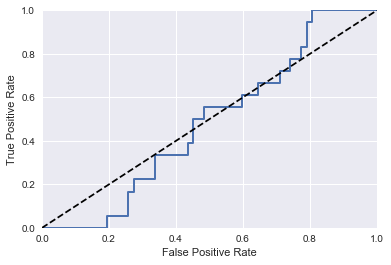


Total Loss incurred by the Bank  -483000.0 DM
Shape of good customers data :-  (200, 21)
Shape of bad customers data :-   (300, 21)

   checking_account_status          credit_history             purpose ...  \
                         1  2  3  4              0  1  2  3  4       0 ...   
1                        0  1  0  0              0  0  1  0  0       0 ...   
4                        1  0  0  0              0  0  0  1  0       1 ...   
9                        0  1  0  0              0  0  0  0  1       1 ...   
10                       0  1  0  0              0  0  1  0  0       1 ...   
11                       1  0  0  0              0  0  1  0  0       0 ...   

   job people_liable    telephone    worker    duration credit_amount age  
     4             1  2         1  2      1  2                             
1    0             1  0         1  0      1  0       48          5951  22  
4    0             0  1         1  0      1  0       24          4870  53  
9    1         

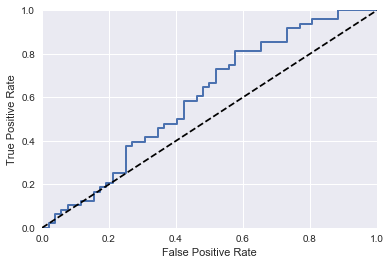


Total Loss incurred by the Bank  -156000.0 DM
Shape of good customers data :-  (300, 21)
Shape of bad customers data :-   (300, 21)

   checking_account_status          credit_history             purpose ...  \
                         1  2  3  4              0  1  2  3  4       0 ...   
1                        0  1  0  0              0  0  1  0  0       0 ...   
4                        1  0  0  0              0  0  0  1  0       1 ...   
9                        0  1  0  0              0  0  0  0  1       1 ...   
10                       0  1  0  0              0  0  1  0  0       1 ...   
11                       1  0  0  0              0  0  1  0  0       0 ...   

   job people_liable    telephone    worker    duration credit_amount age  
     4             1  2         1  2      1  2                             
1    0             1  0         1  0      1  0       48          5951  22  
4    0             0  1         1  0      1  0       24          4870  53  
9    1         

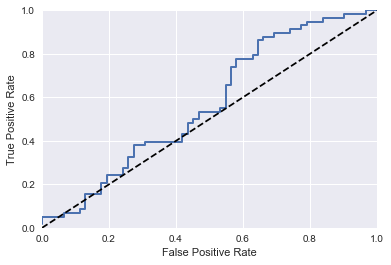


Total Loss incurred by the Bank  -315000.0 DM
Shape of good customers data :-  (400, 21)
Shape of bad customers data :-   (300, 21)

   checking_account_status          credit_history             purpose ...  \
                         1  2  3  4              0  1  2  3  4       0 ...   
1                        0  1  0  0              0  0  1  0  0       0 ...   
4                        1  0  0  0              0  0  0  1  0       1 ...   
9                        0  1  0  0              0  0  0  0  1       1 ...   
10                       0  1  0  0              0  0  1  0  0       1 ...   
11                       1  0  0  0              0  0  1  0  0       0 ...   

   job people_liable    telephone    worker    duration credit_amount age  
     4             1  2         1  2      1  2                             
1    0             1  0         1  0      1  0       48          5951  22  
4    0             0  1         1  0      1  0       24          4870  53  
9    1         

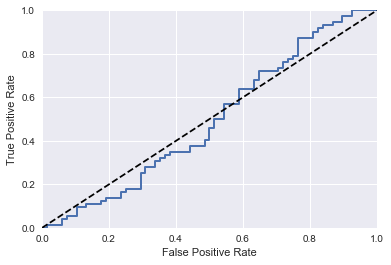


Total Loss incurred by the Bank  -444000.0 DM
Shape of good customers data :-  (500, 21)
Shape of bad customers data :-   (300, 21)

   checking_account_status          credit_history             purpose ...  \
                         1  2  3  4              0  1  2  3  4       0 ...   
1                        0  1  0  0              0  0  1  0  0       0 ...   
4                        1  0  0  0              0  0  0  1  0       1 ...   
9                        0  1  0  0              0  0  0  0  1       1 ...   
10                       0  1  0  0              0  0  1  0  0       1 ...   
11                       1  0  0  0              0  0  1  0  0       0 ...   

   job people_liable    telephone    worker    duration credit_amount age  
     4             1  2         1  2      1  2                             
1    0             1  0         1  0      1  0       48          5951  22  
4    0             0  1         1  0      1  0       24          4870  53  
9    1         

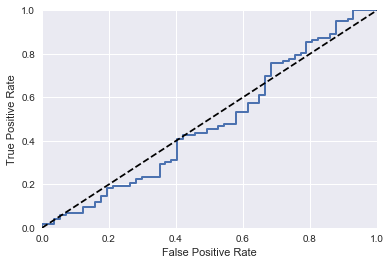


Total Loss incurred by the Bank  -277500.0 DM
Shape of good customers data :-  (600, 21)
Shape of bad customers data :-   (300, 21)

   checking_account_status          credit_history             purpose ...  \
                         1  2  3  4              0  1  2  3  4       0 ...   
1                        0  1  0  0              0  0  1  0  0       0 ...   
4                        1  0  0  0              0  0  0  1  0       1 ...   
9                        0  1  0  0              0  0  0  0  1       1 ...   
10                       0  1  0  0              0  0  1  0  0       1 ...   
11                       1  0  0  0              0  0  1  0  0       0 ...   

   job people_liable    telephone    worker    duration credit_amount age  
     4             1  2         1  2      1  2                             
1    0             1  0         1  0      1  0       48          5951  22  
4    0             0  1         1  0      1  0       24          4870  53  
9    1         

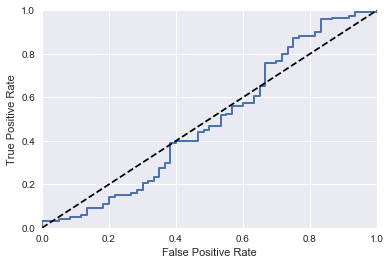


Total Loss incurred by the Bank  -33000.0 DM
Shape of good customers data :-  (700, 21)
Shape of bad customers data :-   (300, 21)

   checking_account_status          credit_history             purpose ...  \
                         1  2  3  4              0  1  2  3  4       0 ...   
1                        0  1  0  0              0  0  1  0  0       0 ...   
4                        1  0  0  0              0  0  0  1  0       1 ...   
9                        0  1  0  0              0  0  0  0  1       1 ...   
10                       0  1  0  0              0  0  1  0  0       1 ...   
11                       1  0  0  0              0  0  1  0  0       0 ...   

   job people_liable    telephone    worker    duration credit_amount age  
     4             1  2         1  2      1  2                             
1    0             1  0         1  0      1  0       48          5951  22  
4    0             0  1         1  0      1  0       24          4870  53  
9    1          

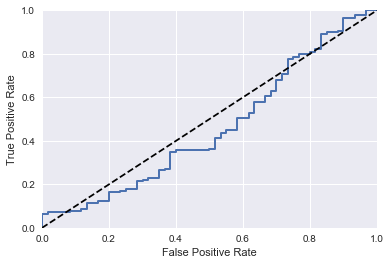


Total Loss incurred by the Bank  171000.0 DM


In [98]:
# Undersampling Good Customer Instances to have 1:1 ratio between Good and Bad Customers data
sample_good = [100,200,300,400,500,600,700]
for size in sample_good:
    good_data = good_customers.sample(n=size,random_state=42)
    print("==========================================================================================================") 
    print("Shape of good customers data :- ",good_data.shape)
    print("Shape of bad customers data :-  ",bad_customers.shape)
    sample_data = pd.concat([bad_customers,good_data])
    sample_data.shape
    sample_data,target = binary_transformation(sample_data)
    print("")
    print(sample_data.head())
    print("")  
# Split the data between Training and Test
    X_train,X_test,y_train,y_test = train_test_split(sample_data,target,test_size=0.20,random_state=42)
    print("")
# fine tune hyperparameters for linear Svc
    best_param = FineTune_LinearSVC(X_train,y_train)
    
# Get the Confusion Matrix for Performance Metrics
    Confusion_Matrix,y_scores = test_evaluation(X_train,X_test,y_train,y_test,best_param['svm_clf__C'])
    print("")
# call the function to plot thr ROC curve
    plot_roc_curve(y_test,y_scores)
    plt.show()
    print("")
    cost_function(Confusion_Matrix)
    print("==========================================================================================================")
    